In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [11]:
%store -r student_courses
%store -r student_majors
%store -r stem_paths
%store -r maker_passes
%store -r jacobs_ethnicities

In [12]:
# stacked bar plot: DESINV Course Enrollment Numbers by Ethnicity and Year
'''
graph_data = jacobs_ethnicities.groupby(['year.name','Ethnicity'], sort=False).count().unstack()['ppsk']
graph_data.plot(kind='bar', stacked=True, figsize=(12,8), xlabel='Year', ylabel='Number of Students', title='DESINV Course Enrollment Numbers by Ethnicity and Year')
'''

"\ngraph_data = jacobs_ethnicities.groupby(['year.name','Ethnicity'], sort=False).count().unstack()['ppsk']\ngraph_data.plot(kind='bar', stacked=True, figsize=(12,8), xlabel='Year', ylabel='Number of Students', title='DESINV Course Enrollment Numbers by Ethnicity and Year')\n"

In [13]:
maker_passes

,ppsk,year,term,DES INV Students,All Courses Students,Maker Pass Holders
0,724096,2015,Fall,Y,Y,Y
1,687168,2015,Fall,N,Y,Y
3,781707,2015,Fall,N,N,Y
5,895798,2015,Fall,N,N,Y
8,857674,2015,Fall,N,N,Y
...,...,...,...,...,...,...
16329,4364634,2020,Fall,N,N,Y
16330,4364856,2020,Fall,N,Y,N
16331,4365425,2020,Fall,N,Y,N
16332,4365890,2020,Fall,N,N,Y


In [14]:
'''
fall2017 = jacobs_ethnicities[jacobs_ethnicities['year.name'] == '2017 Fall'].groupby(['course.number','Ethnicity']).count().unstack()['year.name'].fillna(0)
fall2017 = fall2017[fall2017.index.isin(['198','98','10', '15', '190'])].reindex(['198','98','10', '15', '190'])
fall2017.plot(kind='bar', stacked=True, figsize=(12,8), xlabel='DESINV Course Number', ylabel='Number of Students', title='Fall 2017 DESINV Courses by Ethnicity')
'''

"\nfall2017 = jacobs_ethnicities[jacobs_ethnicities['year.name'] == '2017 Fall'].groupby(['course.number','Ethnicity']).count().unstack()['year.name'].fillna(0)\nfall2017 = fall2017[fall2017.index.isin(['198','98','10', '15', '190'])].reindex(['198','98','10', '15', '190'])\nfall2017.plot(kind='bar', stacked=True, figsize=(12,8), xlabel='DESINV Course Number', ylabel='Number of Students', title='Fall 2017 DESINV Courses by Ethnicity')\n"

In [16]:
student_majors

,ppsk,undergrad.status,year.name,Count of Students,college,division,department,major,exam.units
65498,651215,U,2007 Fall,1,Clg of Letters & Science,L&S Math & Phys Sciences Div,Mathematics,Applied Mathematics,5.4
48603,626974,U,2007 Fall,1,Clg of Letters & Science,L&S Social Sciences Division,Interdisc Social Science Pgms,Development Studies,8.0
7565,329180,U,2007 Fall,1,Clg of Letters & Science,L&S Social Sciences Division,Interdisc Social Science Pgms,Cognitive Science,0.0
7568,329246,G,2007 Fall,1,Grad School of Education,Grad School of Education,Education,Education,0.0
48590,626956,G,2007 Fall,1,Grad School of Education,Grad School of Education,Education,Education,0.0
...,...,...,...,...,...,...,...,...,...
21431,3187659,U,2020 Spring,1,Clg of Letters & Science,L&S Administered Programs,L&S Computer Science,L&S Computer Science,NaN
21432,3187668,U,2020 Spring,1,Clg of Letters & Science,L&S Undeclared,L&S Undeclared,Letters & Sci Undeclared,NaN
21433,3187669,U,2020 Spring,1,Clg of Engineering,Clg of Engineering,Electrical Eng & Computer Sci,Electrical Eng & Comp Sci,NaN
21420,3187555,U,2020 Spring,1,Clg of Letters & Science,L&S Undergrad Studies Division,UG Interdisciplinary Studies,Media Studies,NaN


In [21]:
undergrads = jacobs_ethnicities[jacobs_ethnicities["undergrad.status"] == 'Undergraduate']
first_courses = undergrads.groupby('ppsk', sort=False).first()
first_courses = first_courses.merge(student_majors[['ppsk','major']], on='ppsk')
# comparison to see first and last majors for any given student
#last_courses = undergrads.groupby('ppsk', sort=False).last()
#first_courses.merge(last_courses['year.name'], on='ppsk', how = 'left')[['year.name_x','year.name_y']]#.duplicated()

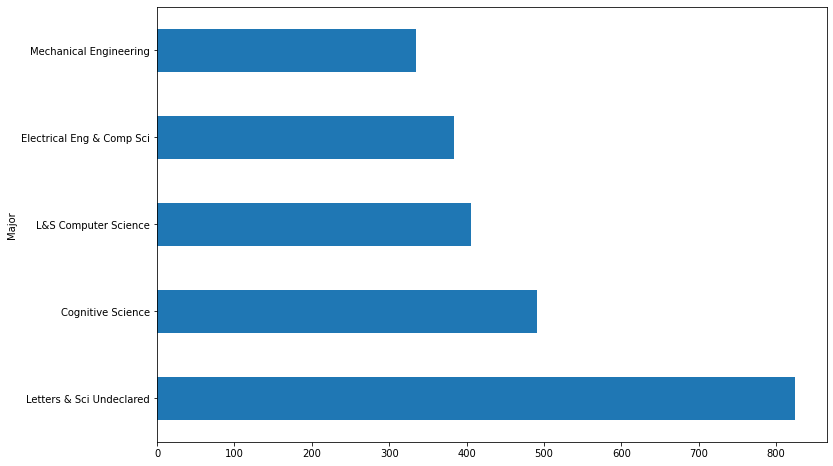

In [35]:
first_courses.groupby('major').count().sort_values(by='ppsk', ascending=False)[['ppsk']].head().plot(kind = 'barh',figsize=(12,8), xlabel="Major", ylabel="Number of Students",legend=None)